In [354]:
#importing necessary libraries for data wrangling and wavelet transform
import numpy as np
import pandas as pd
import seaborn as sns
import pywt
import matplotlib.pyplot as plt

In [430]:
df = pd.read_excel("Data/St-Adolphe-Historical-Data.xlsx")

In [356]:
df.head()

,DateDT,StnID,BatMin,AvgAir_T,MaxAir_T,MinAir_T,AvgRH,MaxRH,MinRH,Precip,...,Avg_Soil_TP50_VMC,Max_Soil_TP50_VMC,Min_Soil_TP50_VMC,Avg_Soil_TP100_TempC,Max_Soil_TP100_TempC,Min_Soil_TP100_TempC,Avg_Soil_TP100_VMC,Max_Soil_TP100_VMC,Min_Soil_TP100_VMC,EvapTot24
0,2011-01-01,243,12.66,-16.56,-14.47,-21.08,73.38,84.7,58.79,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-01-02,243,12.59,-22.76,-15.73,-26.86,75.17,84.7,56.28,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-01-03,243,12.51,-22.84,-17.48,-28.16,76.64,82.4,67.29,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-01-04,243,12.63,-15.29,-12.80,-18.95,75.96,86.3,56.17,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-01-05,243,12.68,-17.46,-13.48,-22.01,82.10,91.2,70.02,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [357]:
df = df[["AvgAir_T","MaxAir_T","MinAir_T","AvgSoil_T05","MaxSoil_T05","MinSoil_T05","Avg_Soil_TP20_TempC",
        "Max_Soil_TP20_TempC","Min_Soil_TP20_TempC","Avg_Soil_TP50_TempC","Max_Soil_TP50_TempC","Min_Soil_TP50_TempC",
        "Avg_Soil_TP100_TempC","Max_Soil_TP100_TempC","Min_Soil_TP100_TempC"]]

In [358]:
df.head()

,AvgAir_T,MaxAir_T,MinAir_T,AvgSoil_T05,MaxSoil_T05,MinSoil_T05,Avg_Soil_TP20_TempC,Max_Soil_TP20_TempC,Min_Soil_TP20_TempC,Avg_Soil_TP50_TempC,Max_Soil_TP50_TempC,Min_Soil_TP50_TempC,Avg_Soil_TP100_TempC,Max_Soil_TP100_TempC,Min_Soil_TP100_TempC
0,-16.56,-14.47,-21.08,-3.05,-2.98,-3.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-22.76,-15.73,-26.86,-3.43,-3.02,-3.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-22.84,-17.48,-28.16,-4.12,-3.76,-4.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-15.29,-12.80,-18.95,-3.99,-3.64,-4.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-17.46,-13.48,-22.01,-3.46,-3.37,-3.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [359]:
df = df.rename(columns={"AvgAir_T":"AvgAir_T_TempC",
                       "MaxAir_T":"MaxAir_T_TempC",
                       "MinAir_T":"MinAir_T_TempC",
                       "AvgSoil_T05":"Avg_Soil_TP05_TempC",
                       "MaxSoil_T05":"Max_Soil_TP05_TempC",
                       "MinSoil_T05":"Min_Soil_TP05_TempC"})
df.head()

,AvgAir_T_TempC,MaxAir_T_TempC,MinAir_T_TempC,Avg_Soil_TP05_TempC,Max_Soil_TP05_TempC,Min_Soil_TP05_TempC,Avg_Soil_TP20_TempC,Max_Soil_TP20_TempC,Min_Soil_TP20_TempC,Avg_Soil_TP50_TempC,Max_Soil_TP50_TempC,Min_Soil_TP50_TempC,Avg_Soil_TP100_TempC,Max_Soil_TP100_TempC,Min_Soil_TP100_TempC
0,-16.56,-14.47,-21.08,-3.05,-2.98,-3.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-22.76,-15.73,-26.86,-3.43,-3.02,-3.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-22.84,-17.48,-28.16,-4.12,-3.76,-4.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-15.29,-12.80,-18.95,-3.99,-3.64,-4.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-17.46,-13.48,-22.01,-3.46,-3.37,-3.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3162 entries, 0 to 3161
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AvgAir_T_TempC        3162 non-null   float64
 1   MaxAir_T_TempC        3162 non-null   float64
 2   MinAir_T_TempC        3162 non-null   float64
 3   Avg_Soil_TP05_TempC   3162 non-null   float64
 4   Max_Soil_TP05_TempC   3162 non-null   float64
 5   Min_Soil_TP05_TempC   3162 non-null   float64
 6   Avg_Soil_TP20_TempC   1038 non-null   float64
 7   Max_Soil_TP20_TempC   1038 non-null   float64
 8   Min_Soil_TP20_TempC   1038 non-null   float64
 9   Avg_Soil_TP50_TempC   1038 non-null   float64
 10  Max_Soil_TP50_TempC   433 non-null    float64
 11  Min_Soil_TP50_TempC   433 non-null    float64
 12  Avg_Soil_TP100_TempC  433 non-null    float64
 13  Max_Soil_TP100_TempC  433 non-null    float64
 14  Min_Soil_TP100_TempC  433 non-null    float64
dtypes: float64(15)
memory

# Outliers Handling 

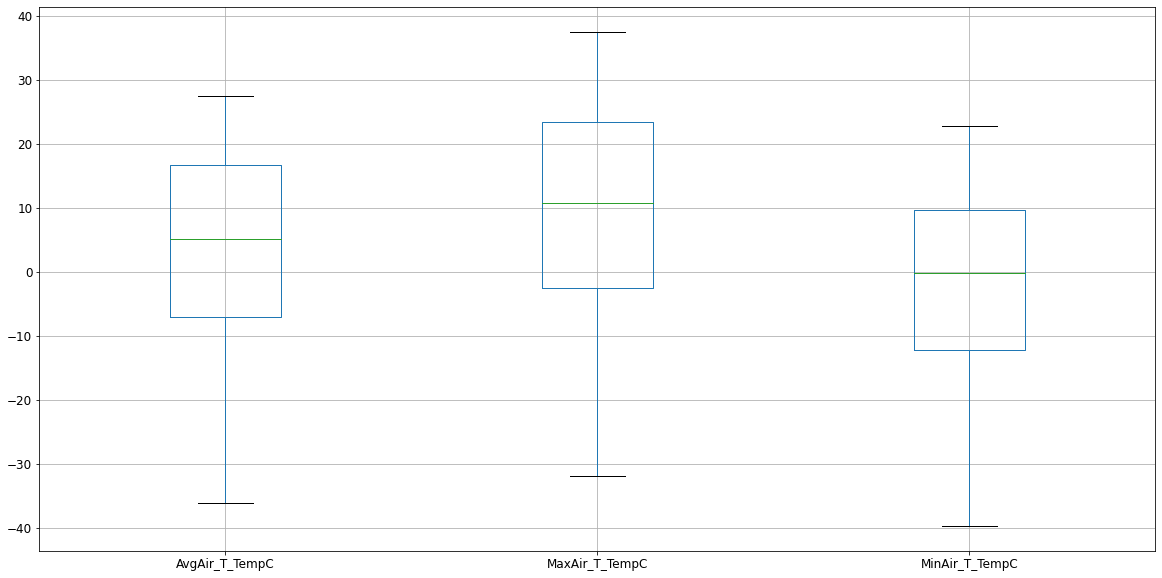

In [361]:
df.boxplot(column= ["AvgAir_T_TempC","MaxAir_T_TempC","MinAir_T_TempC"],figsize=(20,10),fontsize="large")

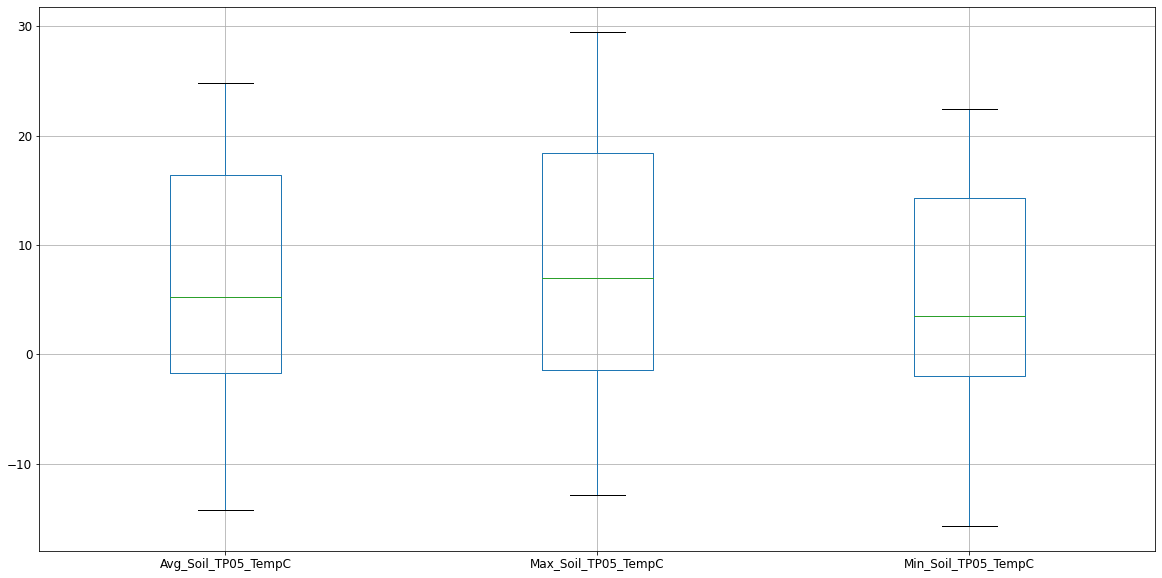

In [362]:
df.boxplot(column= ["Avg_Soil_TP05_TempC","Max_Soil_TP05_TempC","Min_Soil_TP05_TempC"],figsize=(20,10),fontsize="large")

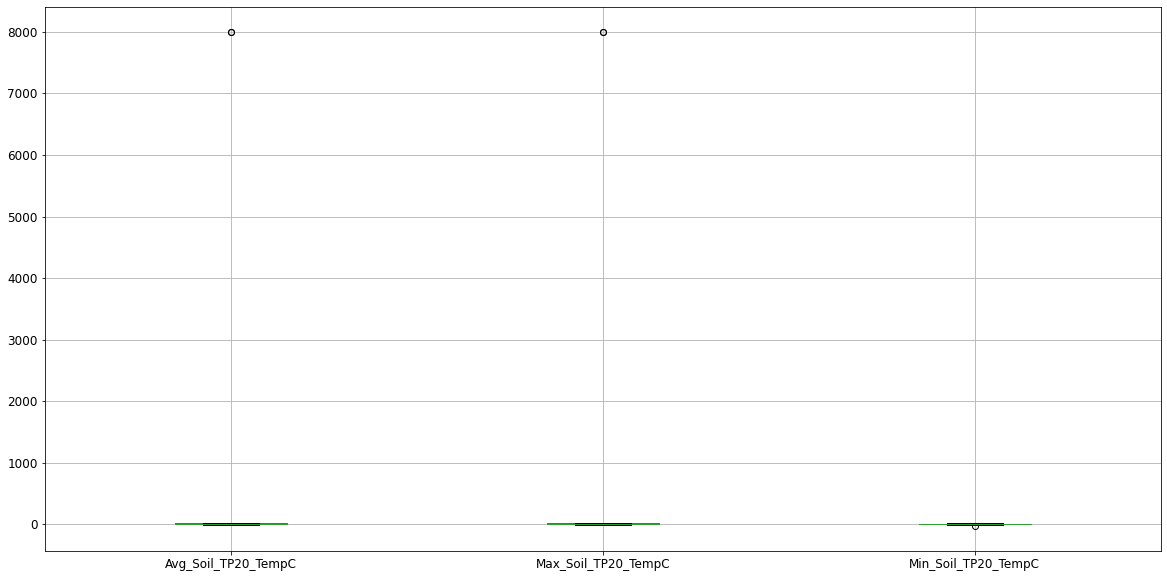

In [363]:
df.boxplot(column= ["Avg_Soil_TP20_TempC","Max_Soil_TP20_TempC","Min_Soil_TP20_TempC"],figsize=(20,10),fontsize="large")

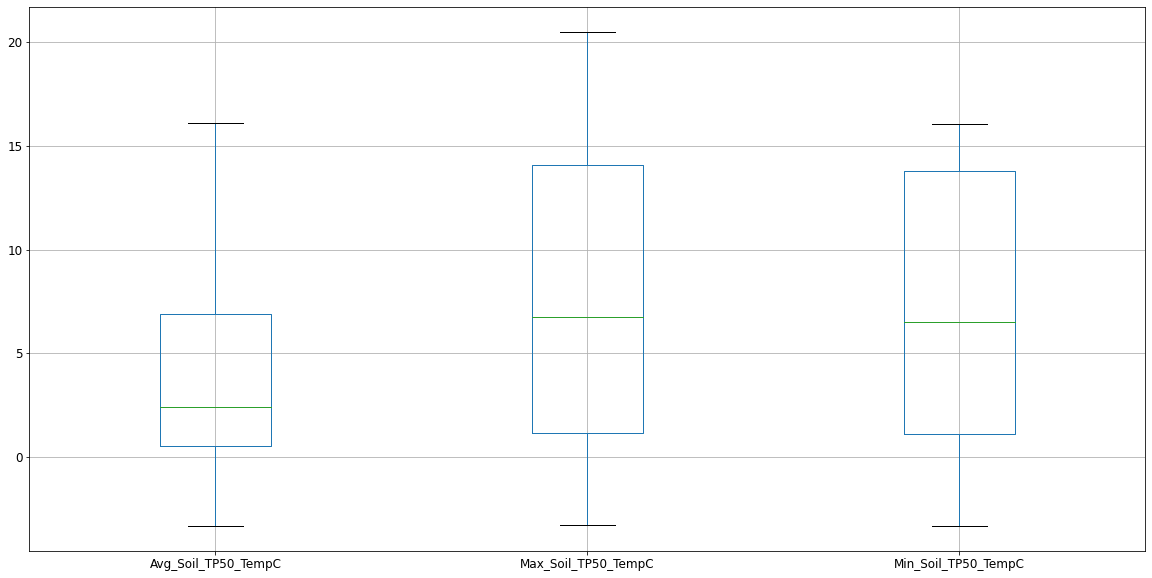

In [364]:
df.boxplot(column= ["Avg_Soil_TP50_TempC","Max_Soil_TP50_TempC","Min_Soil_TP50_TempC"],figsize=(20,10),fontsize="large")

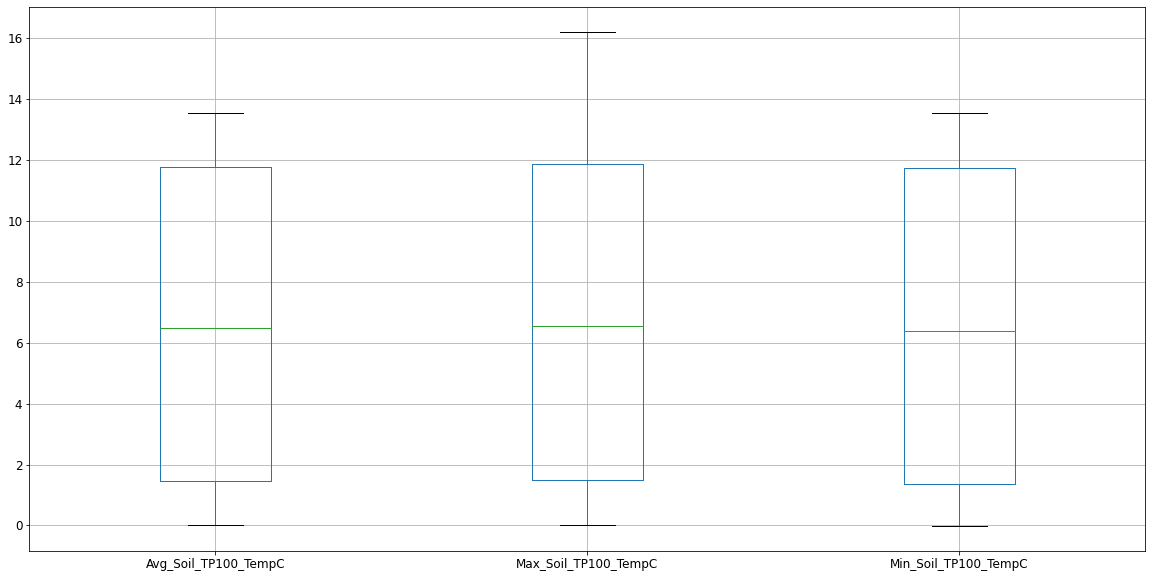

In [365]:
df.boxplot(column= ["Avg_Soil_TP100_TempC","Max_Soil_TP100_TempC","Min_Soil_TP100_TempC"],figsize=(20,10),fontsize="large")

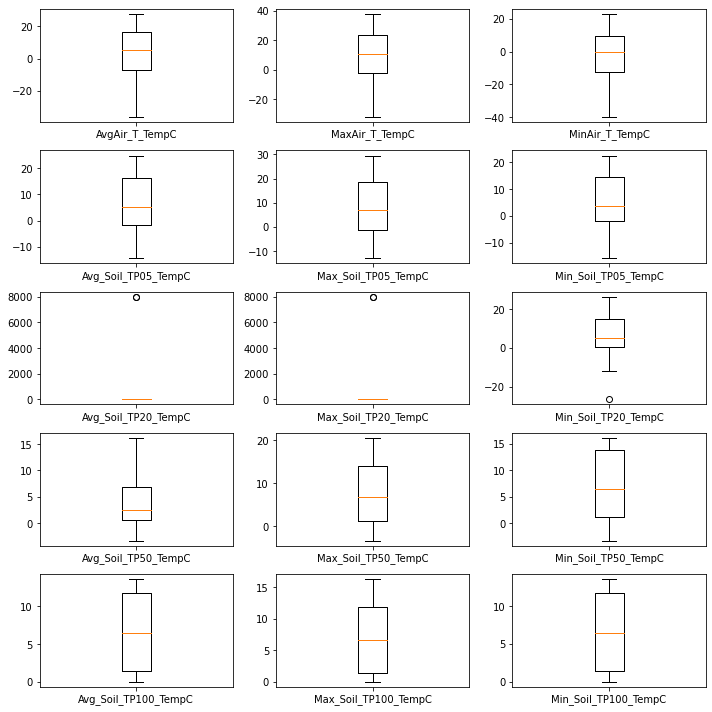

In [366]:
fig, ax = plt.subplots(5,3,figsize = (10,10))
ax[0,0].boxplot(df["AvgAir_T_TempC"].values, labels=["AvgAir_T_TempC"])
ax[0,1].boxplot(df["MaxAir_T_TempC"].values, labels=["MaxAir_T_TempC"])
ax[0,2].boxplot(df["MinAir_T_TempC"].values, labels=["MinAir_T_TempC"])
ax[1,0].boxplot(df["Avg_Soil_TP05_TempC"].values, labels=["Avg_Soil_TP05_TempC"])
ax[1,1].boxplot(df["Max_Soil_TP05_TempC"].values, labels=["Max_Soil_TP05_TempC"])
ax[1,2].boxplot(df["Min_Soil_TP05_TempC"].values, labels=["Min_Soil_TP05_TempC"])
ax[2,0].boxplot(df["Avg_Soil_TP20_TempC"].dropna().values, labels=["Avg_Soil_TP20_TempC"])
ax[2,1].boxplot(df["Max_Soil_TP20_TempC"].dropna().values, labels=["Max_Soil_TP20_TempC"])
ax[2,2].boxplot(df["Min_Soil_TP20_TempC"].dropna().values, labels=["Min_Soil_TP20_TempC"])
ax[3,0].boxplot(df["Avg_Soil_TP50_TempC"].dropna().values, labels=["Avg_Soil_TP50_TempC"])
ax[3,1].boxplot(df["Max_Soil_TP50_TempC"].dropna().values, labels=["Max_Soil_TP50_TempC"])
ax[3,2].boxplot(df["Min_Soil_TP50_TempC"].dropna().values, labels=["Min_Soil_TP50_TempC"])
ax[4,0].boxplot(df["Avg_Soil_TP100_TempC"].dropna().values, labels=["Avg_Soil_TP100_TempC"])
ax[4,1].boxplot(df["Max_Soil_TP100_TempC"].dropna().values, labels=["Max_Soil_TP100_TempC"])
ax[4,2].boxplot(df["Min_Soil_TP100_TempC"].dropna().values, labels=["Min_Soil_TP100_TempC"])

fig.tight_layout()

### So we have some outliers in the soil temperature at the depth of 20 Cm

In [367]:
df[df["Avg_Soil_TP20_TempC"] > 50]["Avg_Soil_TP20_TempC"]

2348    7999.0
2476    7999.0
Name: Avg_Soil_TP20_TempC, dtype: float64

In [368]:
df["Avg_Soil_TP20_TempC"][2348] = df["Avg_Soil_TP20_TempC"][2340:2347 and 2349:2356].mean()
df["Avg_Soil_TP20_TempC"][2348]

18.82

In [369]:
df["Avg_Soil_TP20_TempC"][2476] = df["Avg_Soil_TP20_TempC"][2470:2475 and 2477:2483].mean()
df["Avg_Soil_TP20_TempC"][2476]

14.46

In [370]:
df[df["Max_Soil_TP20_TempC"] > 50]["Max_Soil_TP20_TempC"]

2348    7999.0
2476    7999.0
Name: Max_Soil_TP20_TempC, dtype: float64

In [371]:
df["Max_Soil_TP20_TempC"][2348] = df["Max_Soil_TP20_TempC"][2340:2347 and 2349:2356].mean()
df["Max_Soil_TP20_TempC"][2348]

20.73

In [372]:
df["Max_Soil_TP20_TempC"][2476] = df["Max_Soil_TP20_TempC"][2470:2475 and 2477:2483].mean()
df["Max_Soil_TP20_TempC"][2476]

15.19

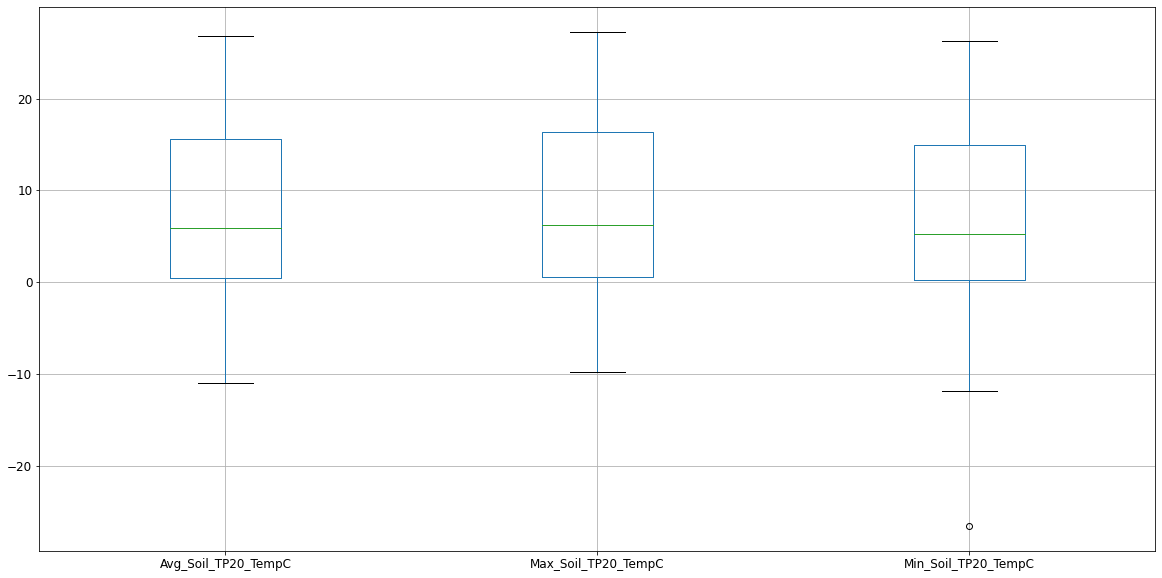

In [373]:
df.boxplot(column= ["Avg_Soil_TP20_TempC","Max_Soil_TP20_TempC","Min_Soil_TP20_TempC"],figsize=(20,10),fontsize="large")

In [431]:
#our main data frame
df.to_excel("Data/df.xlsx",
           sheet_name="Data Frame",
           index=False)

# the data frame for soil temperature at depth=5

In [375]:
df_5 = df[["AvgAir_T_TempC","MaxAir_T_TempC","MinAir_T_TempC",
          "Avg_Soil_TP05_TempC","Max_Soil_TP05_TempC","Min_Soil_TP05_TempC"]]
df_5.head()

,AvgAir_T_TempC,MaxAir_T_TempC,MinAir_T_TempC,Avg_Soil_TP05_TempC,Max_Soil_TP05_TempC,Min_Soil_TP05_TempC
0,-16.56,-14.47,-21.08,-3.05,-2.98,-3.11
1,-22.76,-15.73,-26.86,-3.43,-3.02,-3.76
2,-22.84,-17.48,-28.16,-4.12,-3.76,-4.28
3,-15.29,-12.80,-18.95,-3.99,-3.64,-4.28
4,-17.46,-13.48,-22.01,-3.46,-3.37,-3.64


In [376]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3162 entries, 0 to 3161
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AvgAir_T_TempC       3162 non-null   float64
 1   MaxAir_T_TempC       3162 non-null   float64
 2   MinAir_T_TempC       3162 non-null   float64
 3   Avg_Soil_TP05_TempC  3162 non-null   float64
 4   Max_Soil_TP05_TempC  3162 non-null   float64
 5   Min_Soil_TP05_TempC  3162 non-null   float64
dtypes: float64(6)
memory usage: 148.3 KB


In [377]:
df_5.describe()

,AvgAir_T_TempC,MaxAir_T_TempC,MinAir_T_TempC,Avg_Soil_TP05_TempC,Max_Soil_TP05_TempC,Min_Soil_TP05_TempC
count,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000
mean,3.771765,9.523463,-2.278219,6.610051,8.008934,5.356781
std,14.262450,15.268488,13.859124,9.561144,10.378835,8.891385
min,-36.060000,-31.850000,-39.630000,-14.240000,-12.840000,-15.700000
25%,-6.950000,-2.427500,-12.167500,-1.715000,-1.457500,-1.990000
50%,5.190000,10.865000,-0.140000,5.235000,6.970000,3.510000
75%,16.715000,23.420000,9.620000,16.390000,18.380000,14.327500
max,27.460000,37.490000,22.730000,24.810000,29.480000,22.470000


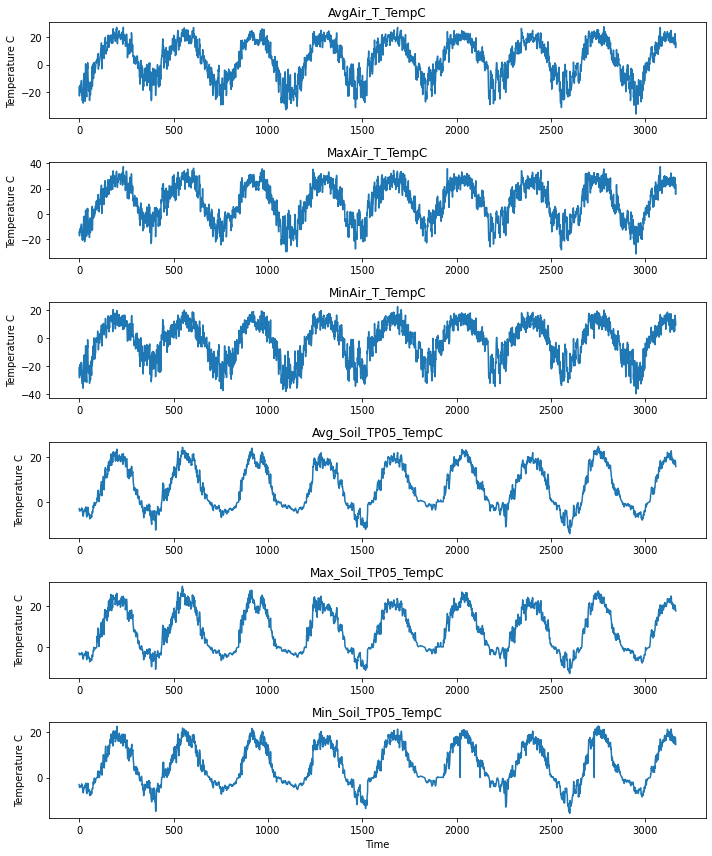

In [429]:
fig , axes = plt.subplots(6,1,figsize=(10,12))

axes[0].plot(df_5["AvgAir_T_TempC"])
axes[0].set_title("AvgAir_T_TempC")
axes[0].set_ylabel("Temperature C")

axes[1].plot(df_5["MaxAir_T_TempC"])
axes[1].set_title("MaxAir_T_TempC")
axes[1].set_ylabel("Temperature C")

axes[2].plot(df_5["MinAir_T_TempC"])
axes[2].set_title("MinAir_T_TempC")
axes[2].set_ylabel("Temperature C")

axes[3].plot(df_5["Avg_Soil_TP05_TempC"])
axes[3].set_title("Avg_Soil_TP05_TempC")
axes[3].set_ylabel("Temperature C")

axes[4].plot(df_5["Max_Soil_TP05_TempC"])
axes[4].set_title("Max_Soil_TP05_TempC")
axes[4].set_ylabel("Temperature C")

axes[5].plot(df_5["Min_Soil_TP05_TempC"])
axes[5].set_title("Min_Soil_TP05_TempC")
axes[5].set_ylabel("Temperature C")
axes[5].set_xlabel("Time")

fig.tight_layout()

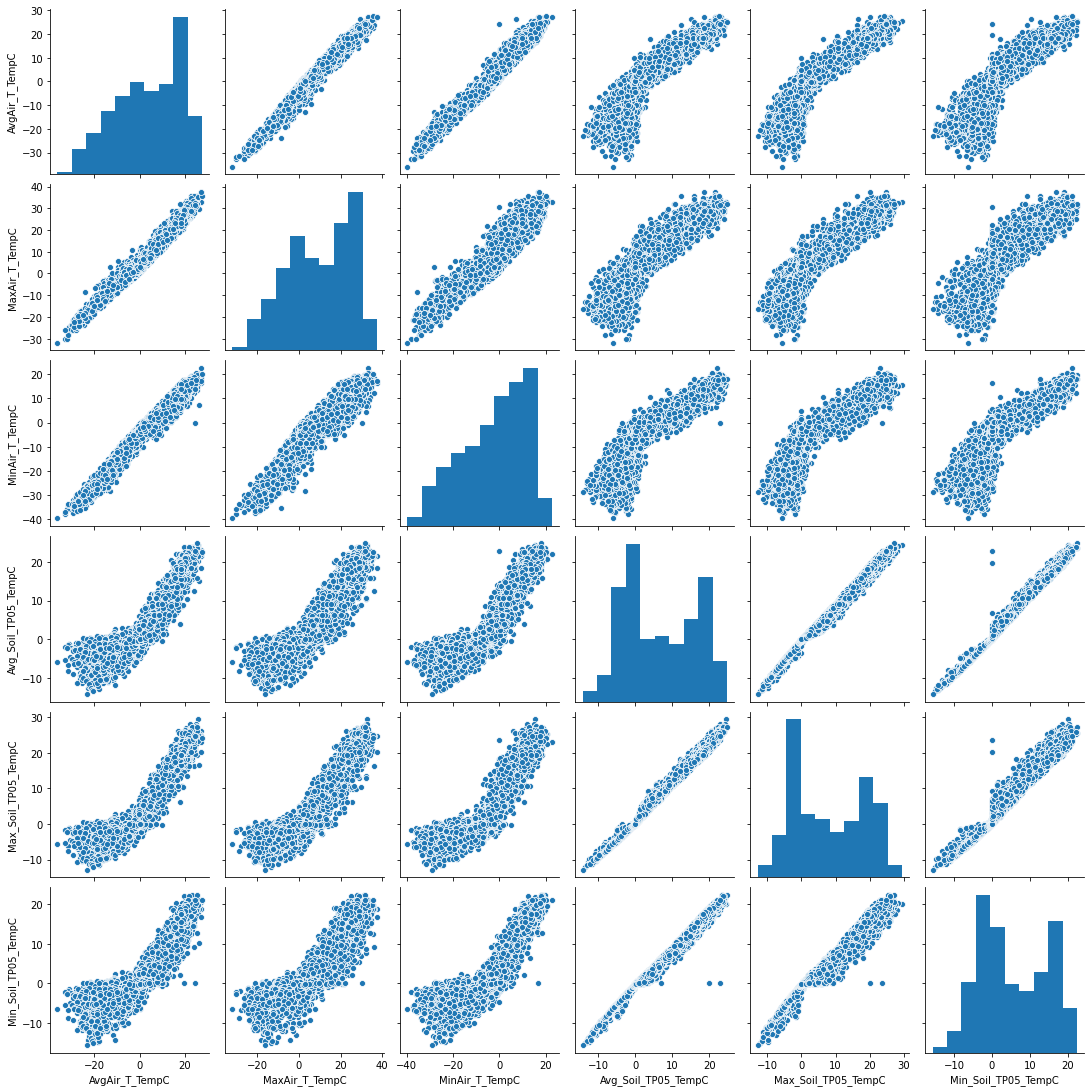

In [378]:
sns.pairplot(df_5)

In [379]:
df_5.to_excel("Data/df_5.xlsx",
           sheet_name="Data Frame",
           index=False)

# the data frame for soil temperature at depth=20

In [380]:
df_20 = df[["AvgAir_T_TempC","MaxAir_T_TempC","MinAir_T_TempC",
          "Avg_Soil_TP20_TempC","Max_Soil_TP20_TempC","Min_Soil_TP20_TempC"]]
df_20.head()  

,AvgAir_T_TempC,MaxAir_T_TempC,MinAir_T_TempC,Avg_Soil_TP20_TempC,Max_Soil_TP20_TempC,Min_Soil_TP20_TempC
0,-16.56,-14.47,-21.08,NaN,NaN,NaN
1,-22.76,-15.73,-26.86,NaN,NaN,NaN
2,-22.84,-17.48,-28.16,NaN,NaN,NaN
3,-15.29,-12.80,-18.95,NaN,NaN,NaN
4,-17.46,-13.48,-22.01,NaN,NaN,NaN


In [381]:
df_20 = df_20.dropna(axis=0)

In [382]:
df_20.reset_index(inplace=True)
df_20.drop(("index"),axis=1,inplace=True)
df_20

,AvgAir_T_TempC,MaxAir_T_TempC,MinAir_T_TempC,Avg_Soil_TP20_TempC,Max_Soil_TP20_TempC,Min_Soil_TP20_TempC
0,8.16,11.96,1.40,8.530,8.85,8.230
1,5.48,7.33,3.47,7.926,8.28,7.774
2,6.41,9.25,1.81,8.130,8.47,7.927
3,9.17,10.67,5.04,8.790,9.15,8.440
4,3.38,5.71,-0.33,8.590,9.09,8.280
...,...,...,...,...,...,...
1033,22.42,28.65,16.47,14.940,15.47,14.750
1034,18.28,21.68,15.88,15.410,15.52,15.280
1035,18.30,23.07,13.83,15.500,15.69,15.420
1036,12.25,15.49,10.87,15.250,15.68,14.770


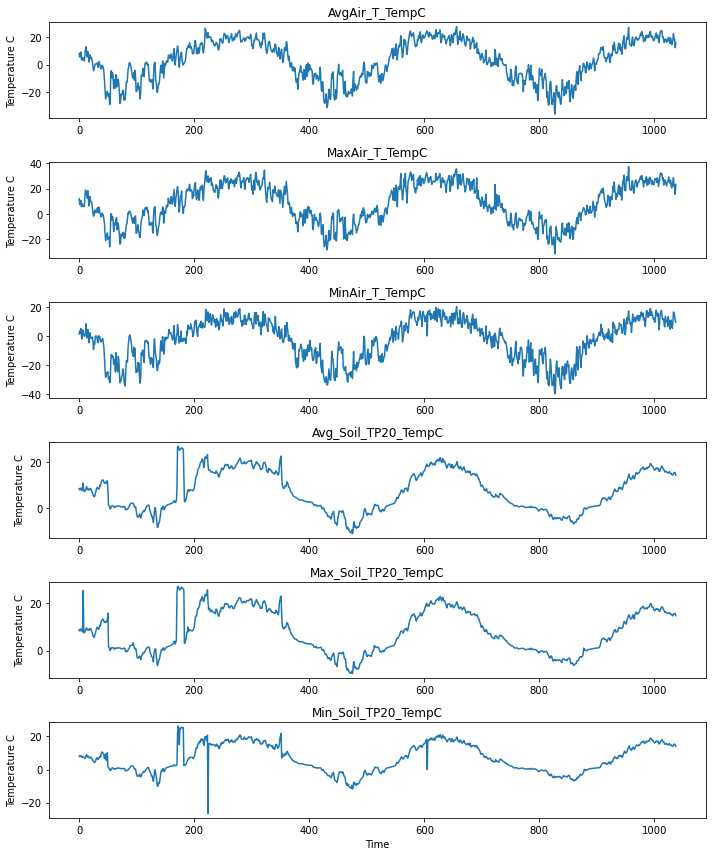

In [383]:
fig , axes = plt.subplots(6,1,figsize=(10,12))

axes[0].plot(df_20["AvgAir_T_TempC"])
axes[0].set_title("AvgAir_T_TempC")
axes[0].set_ylabel("Temperature C")

axes[1].plot(df_20["MaxAir_T_TempC"])
axes[1].set_title("MaxAir_T_TempC")
axes[1].set_ylabel("Temperature C")

axes[2].plot(df_20["MinAir_T_TempC"])
axes[2].set_title("MinAir_T_TempC")
axes[2].set_ylabel("Temperature C")

axes[3].plot(df_20["Avg_Soil_TP20_TempC"])
axes[3].set_title("Avg_Soil_TP20_TempC")
axes[3].set_ylabel("Temperature C")

axes[4].plot(df_20["Max_Soil_TP20_TempC"])
axes[4].set_title("Max_Soil_TP20_TempC")
axes[4].set_ylabel("Temperature C")

axes[5].plot(df_20["Min_Soil_TP20_TempC"])
axes[5].set_title("Min_Soil_TP20_TempC")
axes[5].set_ylabel("Temperature C")
axes[5].set_xlabel("Time")

fig.tight_layout()

In [384]:
#We have found some outliers
#we replace them with the mean of i-5 and i+12:i+18

### Handling the found outliers of Avg_Soil_TP20_TempC

In [385]:
df_20["Avg_Soil_TP20_TempC"][165:188]

165     3.333
166     3.075
167     2.461
168     2.700
169     3.333
170     8.540
171    26.280
172    26.770
173    26.260
174    25.100
175    25.180
176    25.530
177    25.990
178    26.120
179    25.960
180    25.720
181    25.560
182    13.040
183     2.855
184     2.909
185     3.363
186     4.046
187     5.295
Name: Avg_Soil_TP20_TempC, dtype: float64

In [386]:
for i in range(171,183):
        df_20["Avg_Soil_TP20_TempC"].iloc[i] = df_20["Avg_Soil_TP20_TempC"].iloc[i-5:i and i+12:i+18].mean()

In [387]:
df_20["Avg_Soil_TP20_TempC"][165:188]

165    3.333
166    3.075
167    2.461
168    2.700
169    3.333
170    8.540
171    3.075
172    2.461
173    2.700
174    3.333
175    8.540
176    3.075
177    2.461
178    2.700
179    3.333
180    8.540
181    3.075
182    2.461
183    2.855
184    2.909
185    3.363
186    4.046
187    5.295
Name: Avg_Soil_TP20_TempC, dtype: float64

### Handling the found outliers of Max_Soil_TP20_TempC

In [388]:
df_20["Max_Soil_TP20_TempC"][165:188]

165     3.999
166     3.773
167     2.689
168     3.467
169     4.459
170    24.600
171    27.100
172    27.260
173    26.930
174    25.850
175    25.690
176    26.180
177    26.550
178    26.900
179    26.560
180    26.460
181    26.090
182    25.670
183     3.053
184     3.339
185     4.272
186     5.249
187     7.498
Name: Max_Soil_TP20_TempC, dtype: float64

In [389]:
for i in range(170,183):
        df_20["Max_Soil_TP20_TempC"].iloc[i] = df_20["Max_Soil_TP20_TempC"].iloc[i-5:i and i+13:i+19].mean()

In [390]:
df_20["Max_Soil_TP20_TempC"][165:188]

165    3.999
166    3.773
167    2.689
168    3.467
169    4.459
170    3.999
171    3.773
172    2.689
173    3.467
174    4.459
175    3.999
176    3.773
177    2.689
178    3.467
179    4.459
180    3.999
181    3.773
182    2.689
183    3.053
184    3.339
185    4.272
186    5.249
187    7.498
Name: Max_Soil_TP20_TempC, dtype: float64

### Handling the found outliers of Min_Soil_TP20_TempC --> Fill missing values and handling outliers with average of previous/next values

In [391]:
df_20["Min_Soil_TP20_TempC"][165:188]

165     2.896
166     2.677
167     2.310
168     2.338
169     2.581
170     2.909
171    21.850
172    26.290
173    25.380
174    15.050
175    24.820
176    24.530
177    25.510
178    25.480
179    25.600
180    25.250
181    25.320
182     2.469
183     2.701
184     2.646
185     2.858
186     3.265
187     4.404
Name: Min_Soil_TP20_TempC, dtype: float64

In [392]:
for i in range(170,182):
        df_20["Min_Soil_TP20_TempC"].iloc[i] = df_20["Min_Soil_TP20_TempC"].iloc[i-5:i and i+12:i+18].mean()

In [393]:
df_20["Min_Soil_TP20_TempC"][165:188]

165    2.896
166    2.677
167    2.310
168    2.338
169    2.581
170    2.896
171    2.677
172    2.310
173    2.338
174    2.581
175    2.896
176    2.677
177    2.310
178    2.338
179    2.581
180    2.896
181    2.677
182    2.469
183    2.701
184    2.646
185    2.858
186    3.265
187    4.404
Name: Min_Soil_TP20_TempC, dtype: float64

In [394]:
df_20["Min_Soil_TP20_TempC"][210:230]

210    16.33
211    17.44
212    18.48
213    17.58
214    18.31
215    18.57
216    15.69
217    14.64
218    17.06
219    19.92
220    18.99
221    19.87
222    17.30
223    20.79
224   -26.57
225    15.69
226    15.41
227    15.86
228    15.64
229    15.10
Name: Min_Soil_TP20_TempC, dtype: float64

In [395]:
df_20["Min_Soil_TP20_TempC"][224]

-26.57

In [396]:
df_20["Min_Soil_TP20_TempC"].iloc[224] = df_20["Min_Soil_TP20_TempC"].iloc[220:224 and 225:229].mean()

In [397]:
df_20["Min_Soil_TP20_TempC"][224]

18.99

In [398]:
df_20["Min_Soil_TP20_TempC"][600:630]

600    15.55
601    15.89
602    16.80
603    17.57
604    18.36
605     0.00
606    17.51
607    17.83
608    17.46
609    17.88
610    18.73
611    18.15
612    19.05
613    19.07
614    17.99
615    17.94
616    18.30
617    18.93
618    17.73
619    18.30
620    19.44
621    20.06
622    19.53
623    20.17
624    20.69
625    19.56
626    19.68
627    20.95
628    21.02
629    19.78
Name: Min_Soil_TP20_TempC, dtype: float64

In [399]:
df_20["Min_Soil_TP20_TempC"][605]

0.0

In [400]:
df_20["Min_Soil_TP20_TempC"].iloc[605] = df_20["Min_Soil_TP20_TempC"][601:605 and 606:610].mean()

In [401]:
df_20["Min_Soil_TP20_TempC"][605]

15.89

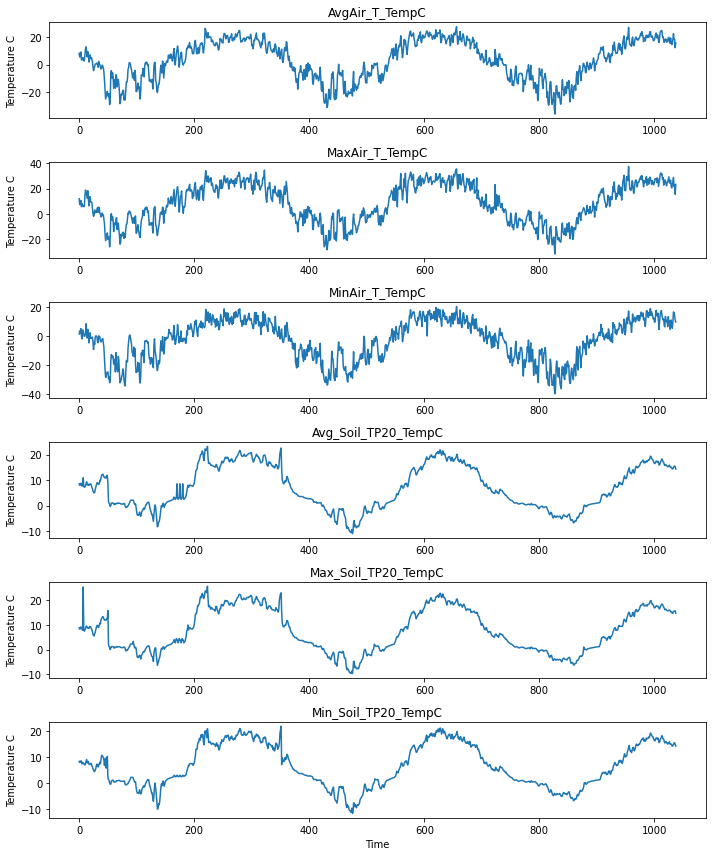

In [402]:
#Final 20
fig , axes = plt.subplots(6,1,figsize=(10,12))

axes[0].plot(df_20["AvgAir_T_TempC"])
axes[0].set_title("AvgAir_T_TempC")
axes[0].set_ylabel("Temperature C")

axes[1].plot(df_20["MaxAir_T_TempC"])
axes[1].set_title("MaxAir_T_TempC")
axes[1].set_ylabel("Temperature C")

axes[2].plot(df_20["MinAir_T_TempC"])
axes[2].set_title("MinAir_T_TempC")
axes[2].set_ylabel("Temperature C")

axes[3].plot(df_20["Avg_Soil_TP20_TempC"])
axes[3].set_title("Avg_Soil_TP20_TempC")
axes[3].set_ylabel("Temperature C")

axes[4].plot(df_20["Max_Soil_TP20_TempC"])
axes[4].set_title("Max_Soil_TP20_TempC")
axes[4].set_ylabel("Temperature C")

axes[5].plot(df_20["Min_Soil_TP20_TempC"])
axes[5].set_title("Min_Soil_TP20_TempC")
axes[5].set_ylabel("Temperature C")
axes[5].set_xlabel("Time")

fig.tight_layout()

In [403]:
df_20

,AvgAir_T_TempC,MaxAir_T_TempC,MinAir_T_TempC,Avg_Soil_TP20_TempC,Max_Soil_TP20_TempC,Min_Soil_TP20_TempC
0,8.16,11.96,1.40,8.530,8.85,8.230
1,5.48,7.33,3.47,7.926,8.28,7.774
2,6.41,9.25,1.81,8.130,8.47,7.927
3,9.17,10.67,5.04,8.790,9.15,8.440
4,3.38,5.71,-0.33,8.590,9.09,8.280
...,...,...,...,...,...,...
1033,22.42,28.65,16.47,14.940,15.47,14.750
1034,18.28,21.68,15.88,15.410,15.52,15.280
1035,18.30,23.07,13.83,15.500,15.69,15.420
1036,12.25,15.49,10.87,15.250,15.68,14.770


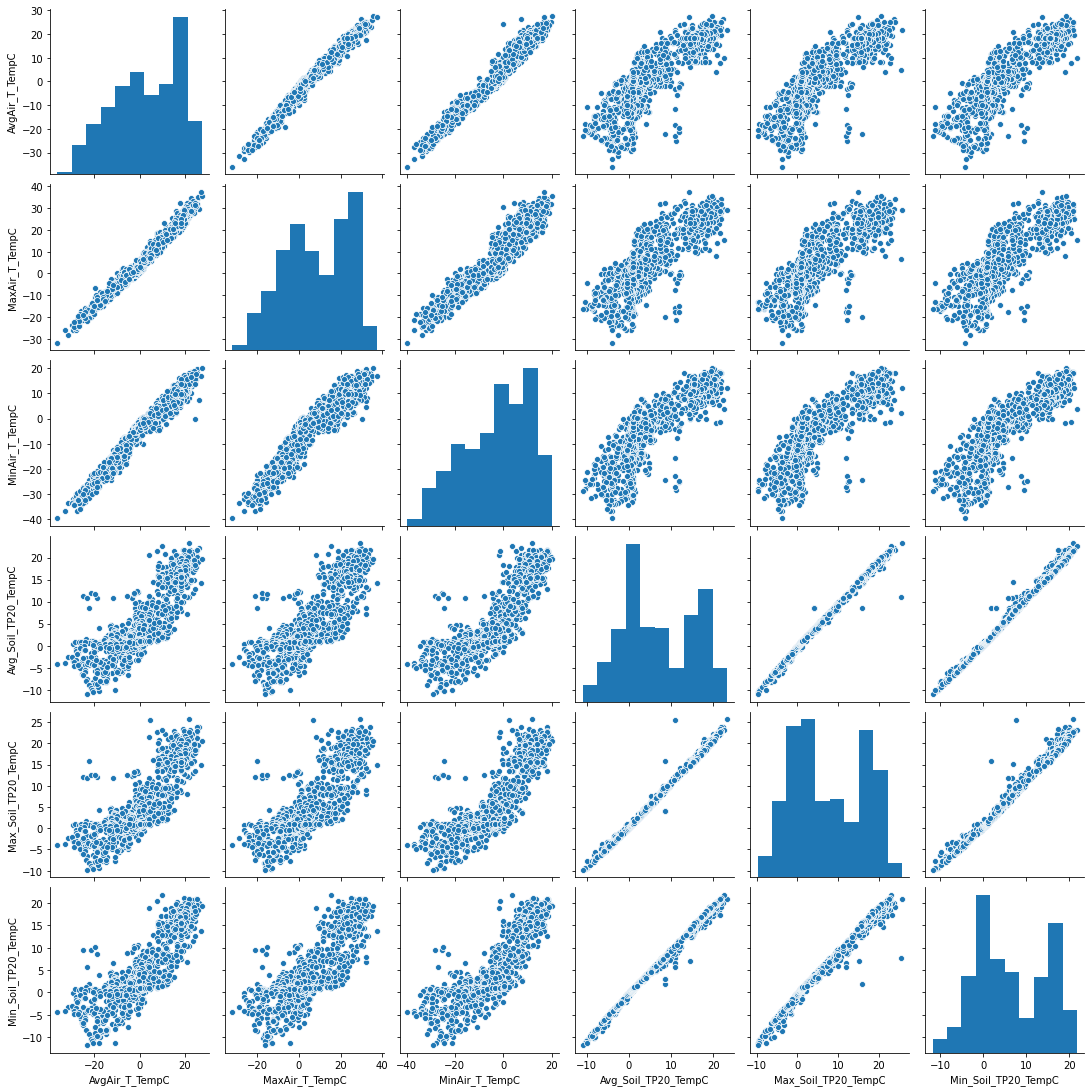

In [404]:
sns.pairplot(df_20)

In [405]:
df_20.to_excel("Data/df_20.xlsx",
           sheet_name="Data Frame",
           index=False)

# the data frame for soil temperature at depth=50

In [406]:
df_50 = df[["AvgAir_T_TempC","MaxAir_T_TempC","MinAir_T_TempC",
          "Avg_Soil_TP50_TempC","Max_Soil_TP50_TempC","Min_Soil_TP50_TempC"]]
df_50.head()

,AvgAir_T_TempC,MaxAir_T_TempC,MinAir_T_TempC,Avg_Soil_TP50_TempC,Max_Soil_TP50_TempC,Min_Soil_TP50_TempC
0,-16.56,-14.47,-21.08,NaN,NaN,NaN
1,-22.76,-15.73,-26.86,NaN,NaN,NaN
2,-22.84,-17.48,-28.16,NaN,NaN,NaN
3,-15.29,-12.80,-18.95,NaN,NaN,NaN
4,-17.46,-13.48,-22.01,NaN,NaN,NaN


In [407]:
df_50.dropna(axis=0,inplace=True)

<ipython-input-407-2c0a4b4875d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_50.dropna(axis=0,inplace=True)


In [408]:
df_50.reset_index(inplace=True, drop=True)

In [409]:
df_50.info

<bound method DataFrame.info of      AvgAir_T_TempC  MaxAir_T_TempC  MinAir_T_TempC  Avg_Soil_TP50_TempC  \
0             24.24           30.42            0.00                15.92   
1             22.25           28.47           16.63                13.03   
2             20.45           24.77           16.77                12.35   
3             20.11           25.32           14.59                12.28   
4             23.52           28.47           17.78                12.31   
..              ...             ...             ...                  ...   
428           22.42           28.65           16.47                14.20   
429           18.28           21.68           15.88                14.20   
430           18.30           23.07           13.83                14.27   
431           12.25           15.49           10.87                14.31   
432           15.67           23.33            9.60                14.27   

     Max_Soil_TP50_TempC  Min_Soil_TP50_TempC  
0      

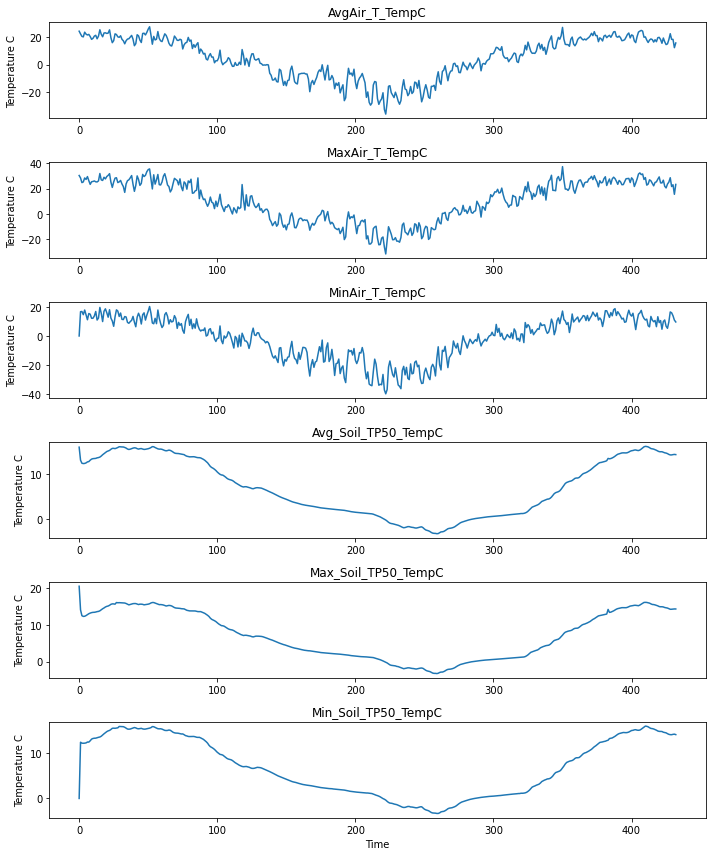

In [410]:
fig , axes = plt.subplots(6,1,figsize=(10,12))

axes[0].plot(df_50["AvgAir_T_TempC"])
axes[0].set_title("AvgAir_T_TempC")
axes[0].set_ylabel("Temperature C")

axes[1].plot(df_50["MaxAir_T_TempC"])
axes[1].set_title("MaxAir_T_TempC")
axes[1].set_ylabel("Temperature C")

axes[2].plot(df_50["MinAir_T_TempC"])
axes[2].set_title("MinAir_T_TempC")
axes[2].set_ylabel("Temperature C")

axes[3].plot(df_50["Avg_Soil_TP50_TempC"])
axes[3].set_title("Avg_Soil_TP50_TempC")
axes[3].set_ylabel("Temperature C")

axes[4].plot(df_50["Max_Soil_TP50_TempC"])
axes[4].set_title("Max_Soil_TP50_TempC")
axes[4].set_ylabel("Temperature C")

axes[5].plot(df_50["Min_Soil_TP50_TempC"])
axes[5].set_title("Min_Soil_TP50_TempC")
axes[5].set_ylabel("Temperature C")
axes[5].set_xlabel("Time")

fig.tight_layout()

## Handling the found outliers of Min_Soil_TP50_TempC --> Interpolation

In [411]:
df_50["Avg_Soil_TP50_TempC"]

0      15.92
1      13.03
2      12.35
3      12.28
4      12.31
       ...  
428    14.20
429    14.20
430    14.27
431    14.31
432    14.27
Name: Avg_Soil_TP50_TempC, Length: 433, dtype: float64

In [412]:
df_50["Max_Soil_TP50_TempC"][0] = np.nan
df_50["Max_Soil_TP50_TempC"].interpolate(limit_direction = "backward", inplace=True)
df_50["Max_Soil_TP50_TempC"]

C:\Users\siava\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\siava\anaconda3\lib\site-packages\pandas\core\generic.py:7023: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


0      14.07
1      14.07
2      12.49
3      12.30
4      12.34
       ...  
428    14.24
429    14.25
430    14.30
431    14.33
432    14.32
Name: Max_Soil_TP50_TempC, Length: 433, dtype: float64

In [413]:
df_50["Min_Soil_TP50_TempC"][0] = np.nan
df_50["Min_Soil_TP50_TempC"].interpolate(limit_direction = "backward", inplace=True)

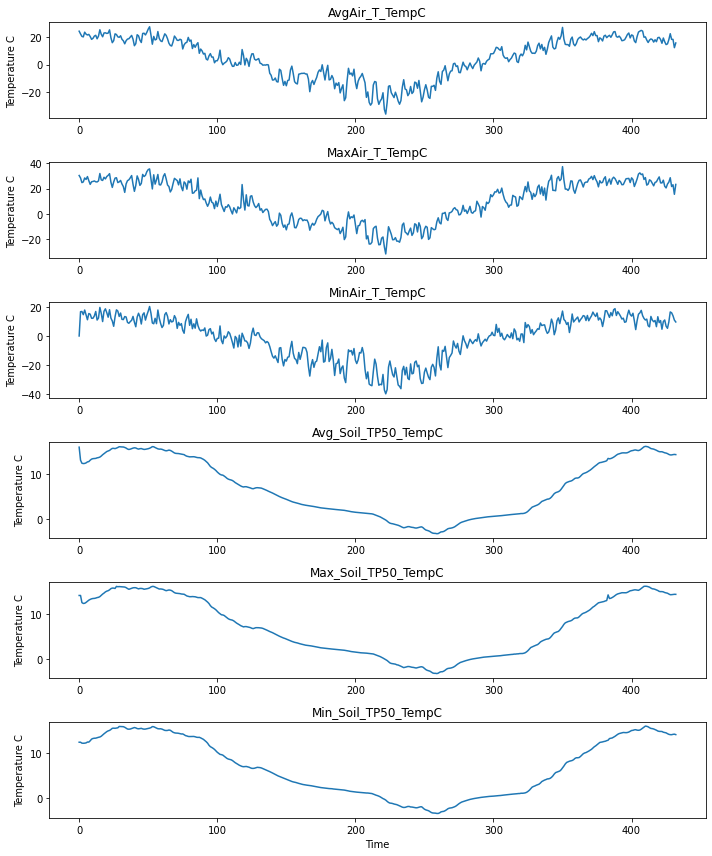

In [414]:
#Final 50
fig , axes = plt.subplots(6,1,figsize=(10,12))

axes[0].plot(df_50["AvgAir_T_TempC"])
axes[0].set_title("AvgAir_T_TempC")
axes[0].set_ylabel("Temperature C")

axes[1].plot(df_50["MaxAir_T_TempC"])
axes[1].set_title("MaxAir_T_TempC")
axes[1].set_ylabel("Temperature C")

axes[2].plot(df_50["MinAir_T_TempC"])
axes[2].set_title("MinAir_T_TempC")
axes[2].set_ylabel("Temperature C")

axes[3].plot(df_50["Avg_Soil_TP50_TempC"])
axes[3].set_title("Avg_Soil_TP50_TempC")
axes[3].set_ylabel("Temperature C")

axes[4].plot(df_50["Max_Soil_TP50_TempC"])
axes[4].set_title("Max_Soil_TP50_TempC")
axes[4].set_ylabel("Temperature C")

axes[5].plot(df_50["Min_Soil_TP50_TempC"])
axes[5].set_title("Min_Soil_TP50_TempC")
axes[5].set_ylabel("Temperature C")
axes[5].set_xlabel("Time")

fig.tight_layout()

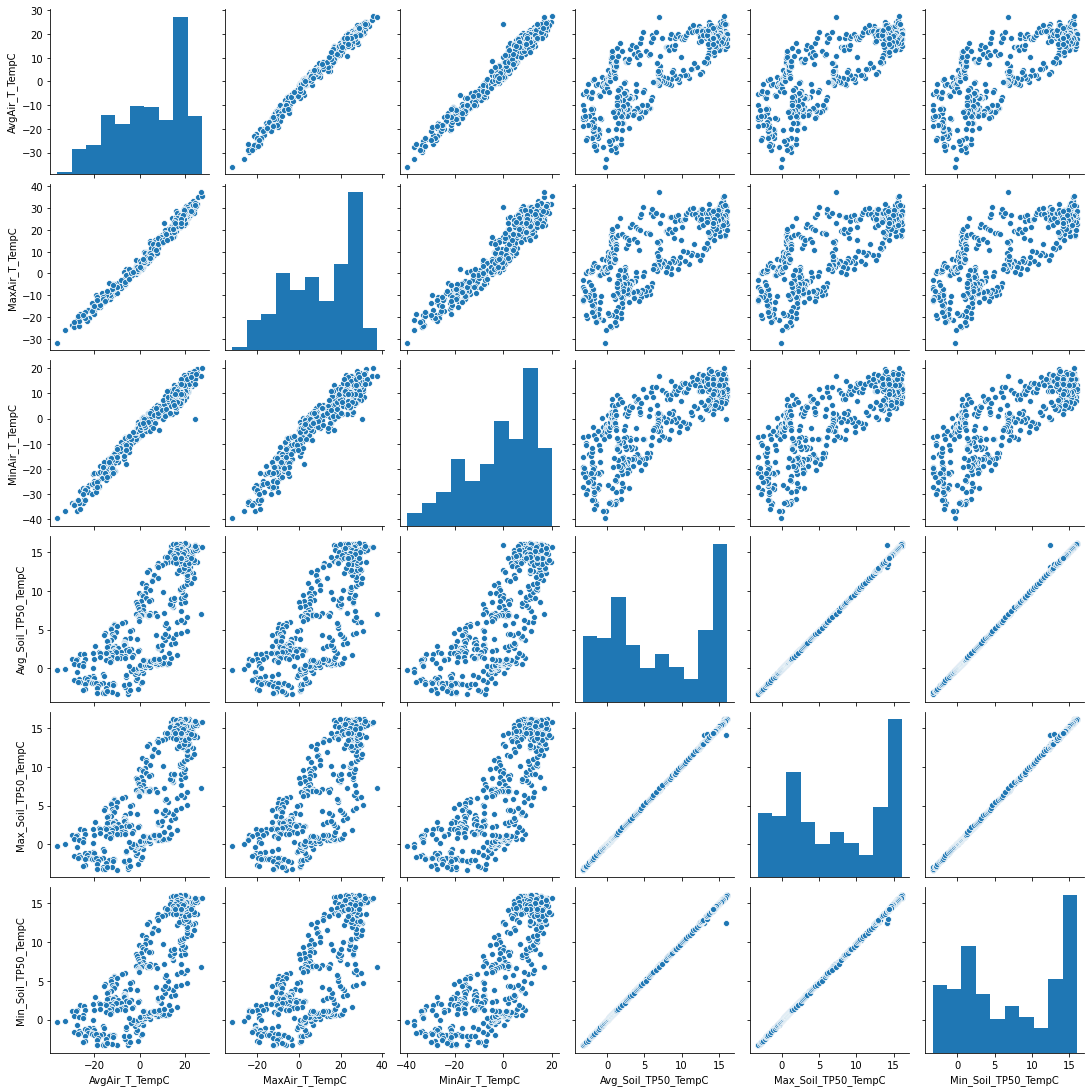

In [415]:
sns.pairplot(df_50)

In [416]:
df_50.to_excel("Data/df_50.xlsx",
           sheet_name="Data Frame",
           index=False)


# the data frame for soil temperature at depth=100

In [417]:
df_100 = df[["AvgAir_T_TempC","MaxAir_T_TempC","MinAir_T_TempC",
          "Avg_Soil_TP100_TempC","Max_Soil_TP100_TempC","Min_Soil_TP100_TempC"]]
df_100.head()

,AvgAir_T_TempC,MaxAir_T_TempC,MinAir_T_TempC,Avg_Soil_TP100_TempC,Max_Soil_TP100_TempC,Min_Soil_TP100_TempC
0,-16.56,-14.47,-21.08,NaN,NaN,NaN
1,-22.76,-15.73,-26.86,NaN,NaN,NaN
2,-22.84,-17.48,-28.16,NaN,NaN,NaN
3,-15.29,-12.80,-18.95,NaN,NaN,NaN
4,-17.46,-13.48,-22.01,NaN,NaN,NaN


In [418]:
df_100.dropna(inplace=True)

<ipython-input-418-40ef2bf6b803>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_100.dropna(inplace=True)


In [419]:
df_100.reset_index(drop=True, inplace=True)

In [420]:
df_100

,AvgAir_T_TempC,MaxAir_T_TempC,MinAir_T_TempC,Avg_Soil_TP100_TempC,Max_Soil_TP100_TempC,Min_Soil_TP100_TempC
0,24.24,30.42,0.00,10.860,16.200,0.000
1,22.25,28.47,16.63,8.150,8.910,7.823
2,20.45,24.77,16.77,7.739,7.823,7.702
3,20.11,25.32,14.59,7.795,7.890,7.717
4,23.52,28.47,17.78,7.982,8.080,7.880
...,...,...,...,...,...,...
428,22.42,28.65,16.47,12.950,12.990,12.920
429,18.28,21.68,15.88,12.890,12.920,12.880
430,18.30,23.07,13.83,12.870,12.880,12.860
431,12.25,15.49,10.87,12.860,12.870,12.850


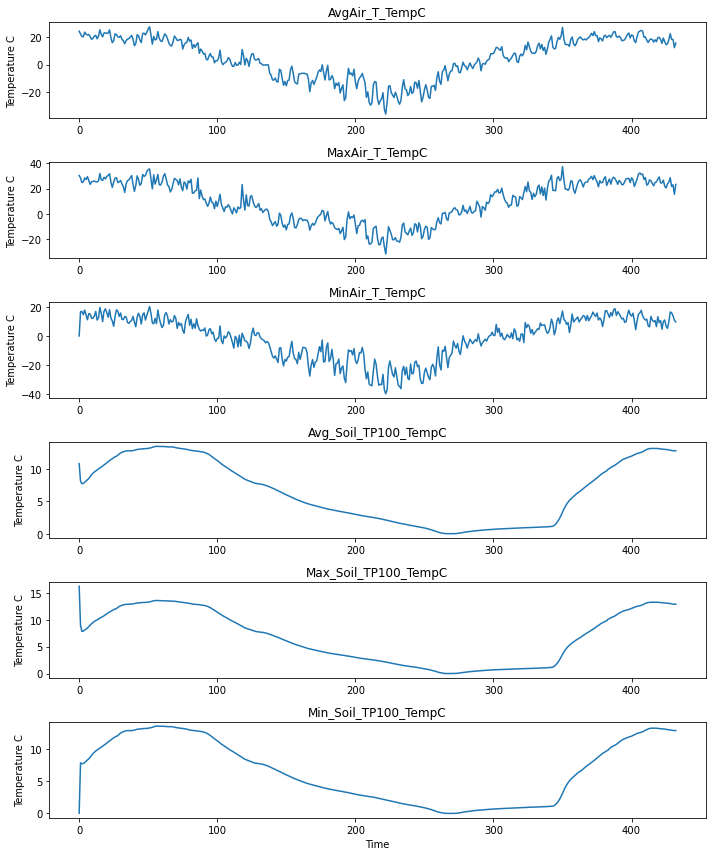

In [421]:
fig , axes = plt.subplots(6,1,figsize=(10,12))

axes[0].plot(df_100["AvgAir_T_TempC"])
axes[0].set_title("AvgAir_T_TempC")
axes[0].set_ylabel("Temperature C")

axes[1].plot(df_100["MaxAir_T_TempC"])
axes[1].set_title("MaxAir_T_TempC")
axes[1].set_ylabel("Temperature C")

axes[2].plot(df_100["MinAir_T_TempC"])
axes[2].set_title("MinAir_T_TempC")
axes[2].set_ylabel("Temperature C")

axes[3].plot(df_100["Avg_Soil_TP100_TempC"])
axes[3].set_title("Avg_Soil_TP100_TempC")
axes[3].set_ylabel("Temperature C")

axes[4].plot(df_100["Max_Soil_TP100_TempC"])
axes[4].set_title("Max_Soil_TP100_TempC")
axes[4].set_ylabel("Temperature C")

axes[5].plot(df_100["Min_Soil_TP100_TempC"])
axes[5].set_title("Min_Soil_TP100_TempC")
axes[5].set_ylabel("Temperature C")
axes[5].set_xlabel("Time")

fig.tight_layout()

## Handling the found outliers of Min_Soil_TP100_TempC --> Interpolation

In [422]:
df_100["Max_Soil_TP100_TempC"][0] = np.nan
df_100["Max_Soil_TP100_TempC"].interpolate(limit_direction = "backward", inplace=True)

C:\Users\siava\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\siava\anaconda3\lib\site-packages\pandas\core\generic.py:7023: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [423]:
df_100["Min_Soil_TP100_TempC"][0] = np.nan
df_100["Min_Soil_TP100_TempC"].interpolate(limit_direction = "backward", inplace=True)

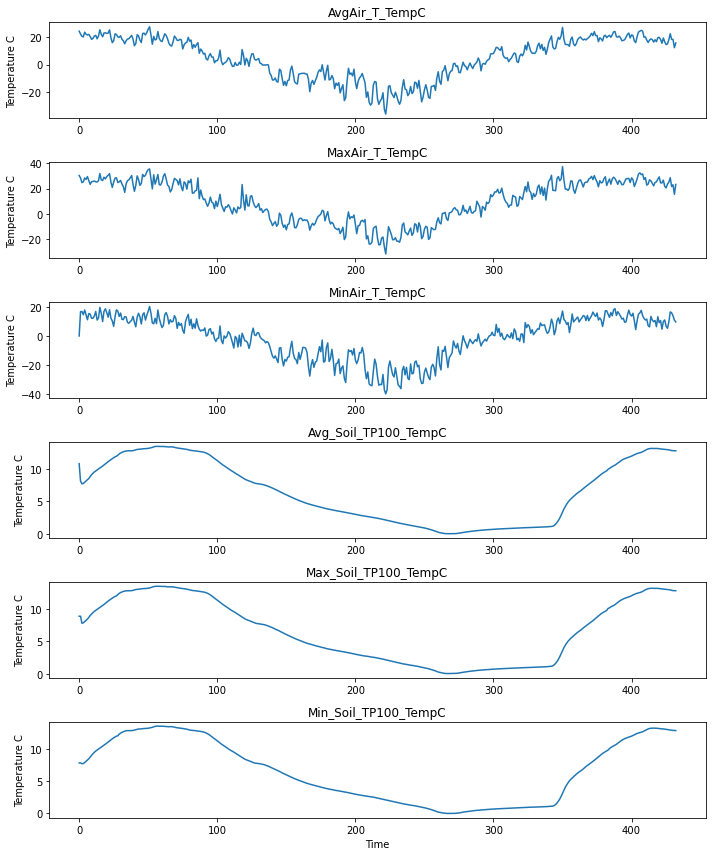

In [424]:
###Final 100
fig , axes = plt.subplots(6,1,figsize=(10,12))

axes[0].plot(df_100["AvgAir_T_TempC"])
axes[0].set_title("AvgAir_T_TempC")
axes[0].set_ylabel("Temperature C")

axes[1].plot(df_100["MaxAir_T_TempC"])
axes[1].set_title("MaxAir_T_TempC")
axes[1].set_ylabel("Temperature C")

axes[2].plot(df_100["MinAir_T_TempC"])
axes[2].set_title("MinAir_T_TempC")
axes[2].set_ylabel("Temperature C")

axes[3].plot(df_100["Avg_Soil_TP100_TempC"])
axes[3].set_title("Avg_Soil_TP100_TempC")
axes[3].set_ylabel("Temperature C")

axes[4].plot(df_100["Max_Soil_TP100_TempC"])
axes[4].set_title("Max_Soil_TP100_TempC")
axes[4].set_ylabel("Temperature C")

axes[5].plot(df_100["Min_Soil_TP100_TempC"])
axes[5].set_title("Min_Soil_TP100_TempC")
axes[5].set_ylabel("Temperature C")
axes[5].set_xlabel("Time")

fig.tight_layout()

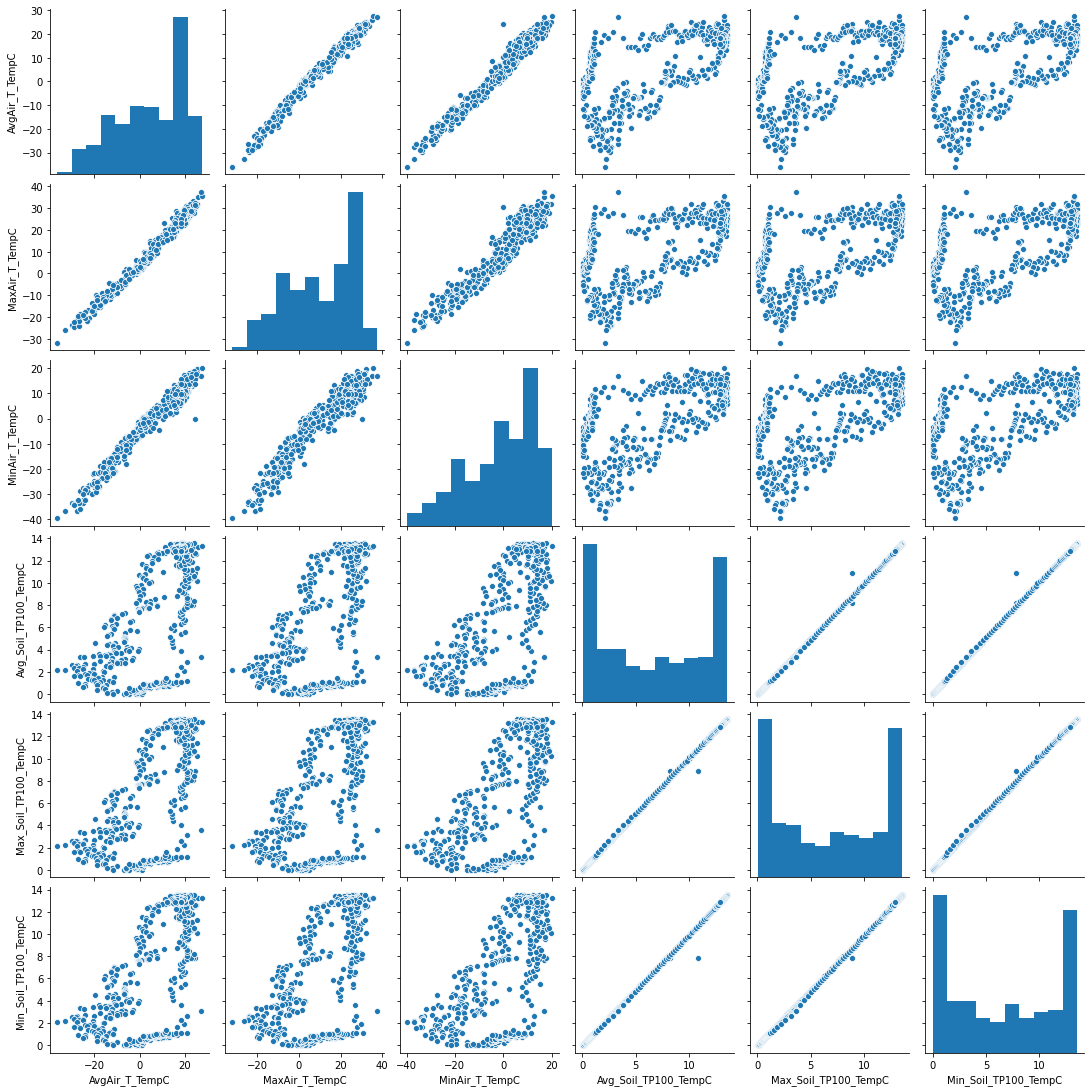

In [425]:
sns.pairplot(df_100)

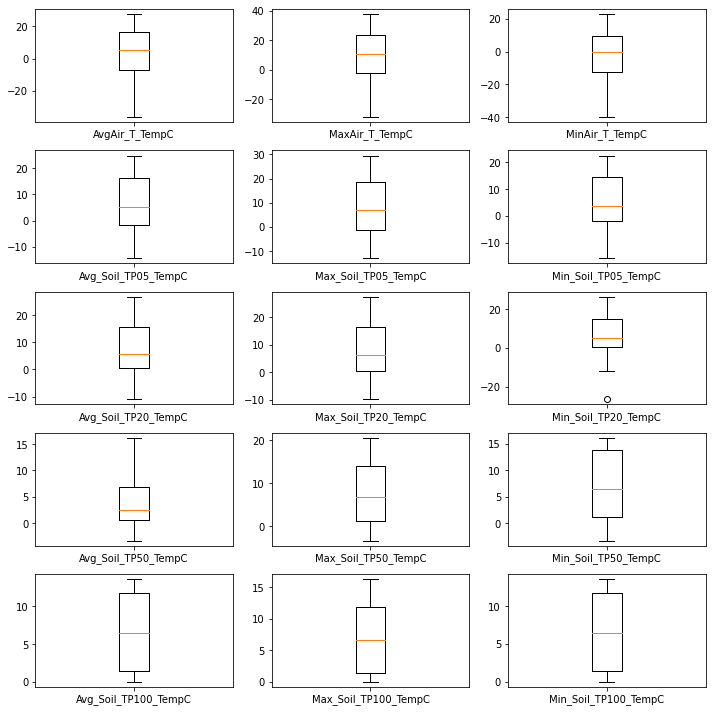

In [426]:
fig, ax = plt.subplots(5,3,figsize = (10,10))
ax[0,0].boxplot(df["AvgAir_T_TempC"].values, labels=["AvgAir_T_TempC"])
ax[0,1].boxplot(df["MaxAir_T_TempC"].values, labels=["MaxAir_T_TempC"])
ax[0,2].boxplot(df["MinAir_T_TempC"].values, labels=["MinAir_T_TempC"])
ax[1,0].boxplot(df["Avg_Soil_TP05_TempC"].values, labels=["Avg_Soil_TP05_TempC"])
ax[1,1].boxplot(df["Max_Soil_TP05_TempC"].values, labels=["Max_Soil_TP05_TempC"])
ax[1,2].boxplot(df["Min_Soil_TP05_TempC"].values, labels=["Min_Soil_TP05_TempC"])
ax[2,0].boxplot(df["Avg_Soil_TP20_TempC"].dropna().values, labels=["Avg_Soil_TP20_TempC"])
ax[2,1].boxplot(df["Max_Soil_TP20_TempC"].dropna().values, labels=["Max_Soil_TP20_TempC"])
ax[2,2].boxplot(df["Min_Soil_TP20_TempC"].dropna().values, labels=["Min_Soil_TP20_TempC"])
ax[3,0].boxplot(df["Avg_Soil_TP50_TempC"].dropna().values, labels=["Avg_Soil_TP50_TempC"])
ax[3,1].boxplot(df["Max_Soil_TP50_TempC"].dropna().values, labels=["Max_Soil_TP50_TempC"])
ax[3,2].boxplot(df["Min_Soil_TP50_TempC"].dropna().values, labels=["Min_Soil_TP50_TempC"])
ax[4,0].boxplot(df["Avg_Soil_TP100_TempC"].dropna().values, labels=["Avg_Soil_TP100_TempC"])
ax[4,1].boxplot(df["Max_Soil_TP100_TempC"].dropna().values, labels=["Max_Soil_TP100_TempC"])
ax[4,2].boxplot(df["Min_Soil_TP100_TempC"].dropna().values, labels=["Min_Soil_TP100_TempC"])

fig.tight_layout()

In [427]:
df_100.to_excel("Data/df_100.xlsx",
           sheet_name="Data Frame",
           index=False)